# Iris Dataset: Practicing ML Models

### Iris Dataset Info

In [1]:
import pandas as pd

In [2]:
#import Iris Dataset
df = pd.read_csv('C:\\Users\\sheet\\Downloads\\Iris.csv')

In [3]:
#shows first 5 records of dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#summarizes columns, dtypes, and etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#function shows all columns in dataframe
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#drop ID column since we don't need it
df.drop(columns='Id', axis = 1, inplace = True)

In [7]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Transforming Data

In [8]:
#import requried libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
#LabelEncoder converts categorical variables into numerical format
#convert species into numerical classes
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [10]:
#we can see categorical vars became numbers
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#X: columns 1-4 (features variable)
X = df.drop(['Species'], axis = 1)
#Y: column 5 (Target Variable)
Y = df['Species']

### EDA

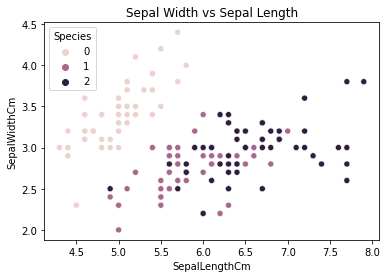

In [12]:
#visualize Sepal Length vs Sepal Width -- we can see class 0 is linearly separable while class 1 
#and 2 are harder to separate
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title('Sepal Width vs Sepal Length')
plt.show()

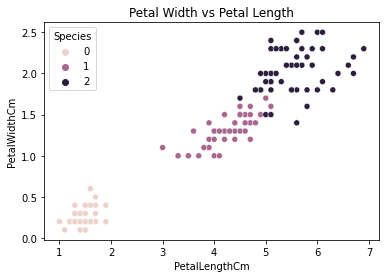

In [13]:
#visualize Petal Length vs Petal Width -- we can see class 0 is linearly separable. class 1 and 2 
#can be distinguished as well
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.title('Petal Width vs Petal Length')
plt.show()

<AxesSubplot:>

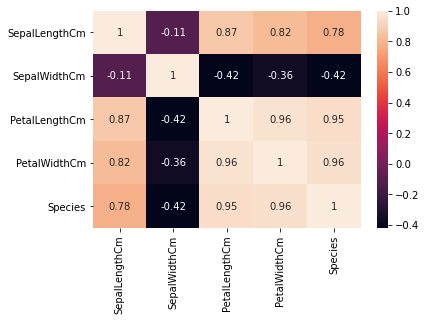

In [14]:
#Heatmap: shows us important relationships to look at
sns.heatmap(df.corr(), annot=True)

### Model 1: SVM

In [15]:
#Randomly Split data (Train: 80/ Test:20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
#import SVM
from sklearn.svm import SVC
svn = SVC()

In [17]:
#Fit the model & Train
svn.fit(X_train, y_train)

SVC()

In [18]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [19]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Model 2: KNN

In [20]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#Randomly Split data (Train: 80/ Test:20)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2)

In [22]:
#Fit the model & Train - i picked k = 5
knn = KNeighborsClassifier(5)
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [23]:
# Predict from the test dataset
predictions = knn.predict(X_test1)

# Calculate the accuracy
accuracy_score(y_test1, predictions)

0.9666666666666667

In [24]:
#Classification report
print(classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



### Model 3: RandomForest

In [25]:
#import RF
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Randomly Split data (Train: 80/ Test:20)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.2)

In [27]:
#Fit the model & Train - I picked 100 trees
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [28]:
# Predict from the test dataset
predictions = rf.predict(X_test2)

# Calculate the accuracy
accuracy_score(y_test2, predictions)

0.9666666666666667

In [29]:
#Classification report
print(classification_report(y_test2, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Model 4: MLP

In [30]:
#Import MLP
from sklearn.neural_network import MLPClassifier

In [31]:
#Randomly Split data (Train: 80/ Test:20)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,Y, test_size=0.2)

In [32]:
#Fit the model & Train

#One Single hidden layer w/ 100 neurons, ReLU activation function, Adaptive Moment Estimation optimizer, 
#L2 regularization with 0.0001 penalty & maximum of 800 training iterations.

mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)
mlp.fit(X_train3, y_train3)

MLPClassifier(max_iter=800)

In [33]:
# Predict from the test dataset
predictions = mlp.predict(X_test3)

# Calculate the accuracy
accuracy_score(y_test3, predictions)

0.9666666666666667

In [34]:
#Classification Report
print(classification_report(y_test3, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Model 5: Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,Y, test_size=0.2, random_state = 42)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train4, y_train4)

LogisticRegression()

In [38]:
predictions = log_reg.predict(X_test4)

# Calculate the accuracy
accuracy_score(y_test4, predictions)

1.0

In [39]:
#Classification Report
print(classification_report(y_test4, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Unsupervised Learning

### K means Clustering

In [40]:
from sklearn.cluster import KMeans
from sklearn import datasets

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

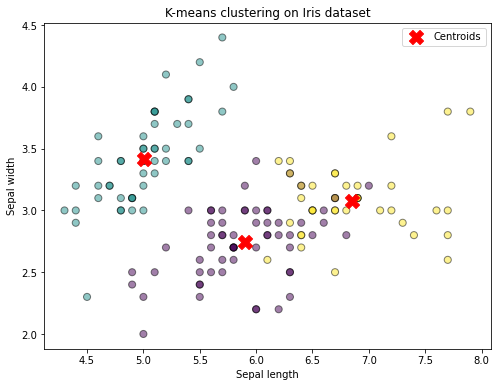

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Getting the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plotting the clusters based on first two columns (features)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5, edgecolors='k')

# Plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-means clustering on Iris dataset')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(Y, labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.7302382722834697


In [51]:
from sklearn import metrics

sil_score = metrics.silhouette_score(X, labels)
cali_score = metrics.calinski_harabasz_score(X, labels)
davies_score = metrics.davies_bouldin_score(X, labels)

print("Metric\t\t\tScore")
print("Silhouette Score\t{}".format(sil_score.round(3)))
print("Calinski-Harabaz Index\t{}".format(cali_score.round(3)))
print("Davies-Bouldin Index\t{}".format(davies_score.round(3)))

Metric			Score
Silhouette Score	0.553
Calinski-Harabaz Index	560.4
Davies-Bouldin Index	0.662


### PCA

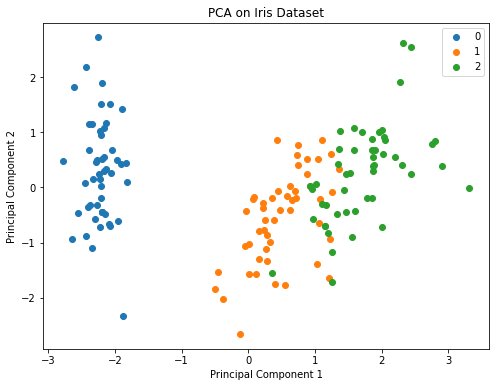

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
for species in Y.unique():
    plt.scatter(X_pca[Y == species, 0], X_pca[Y == species, 1], label=species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()
plt.show()

### Analysis of Classification Models

In [44]:
#Print all the testing accuracies of the models 
#/t just adds space between both Columns
#.round rounds to 3 decimal points or less
#{} is string interpolation (placeholder for the accuracy)
print("Model\t\tTestAccuracy")
print("SVM\t\t{}".format(svn.score(X_test, y_test).round(3)))
print("KNN\t\t{}".format(knn.score(X_test1, y_test1).round(3)))
print("RandomForest\t{}".format(rf.score(X_test2, y_test2).round(3)))
print("MLP\t\t{}".format(mlp.score(X_test3, y_test3).round(3)))
print("LogisticReg\t{}".format(log_reg.score(X_test4, y_test4).round(3)))

Model		TestAccuracy
SVM		1.0
KNN		0.967
RandomForest	0.967
MLP		0.967
LogisticReg	1.0


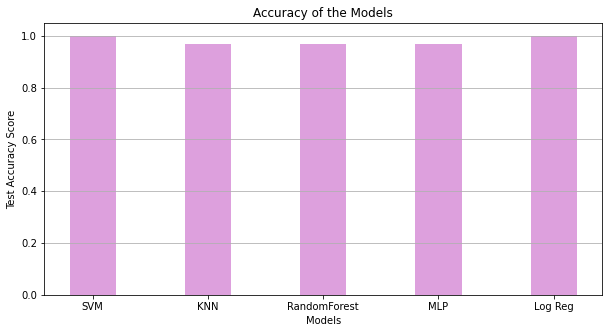

In [46]:
#Bar Chart for model accuracies 
data = {'SVM':svn.score(X_test, y_test).round(3), 
        'KNN':knn.score(X_test1, y_test1).round(3), 
        'RandomForest':rf.score(X_test2, y_test2).round(3), 
        'MLP':mlp.score(X_test3, y_test3).round(3),
        'Log Reg': log_reg.score(X_test4, y_test4).round(3)}

models = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, accuracy, color ='Plum', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Test Accuracy Score")
plt.title("Accuracy of the Models")
plt.grid(axis="y")
plt.show()

#### We can note that the SVM & Logistic Reg Model performed the best, but all the other models' accuracies were also high. All the models work well with the data